<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('/content/drive/My Drive/Data/Wine.csv', names = ['class','Alcohol','MalicAcid','Ash','AshAlcalinity','Magnesium','Phenol','Flavanoid','NonFlavanoid','Proanthocyanins','ColorIntensity','Hue','DilutedWines','Proline'])

In [6]:
data.head()

,class,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   MalicAcid        178 non-null    float64
 3   Ash              178 non-null    float64
 4   AshAlcalinity    178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenol           178 non-null    float64
 7   Flavanoid        178 non-null    float64
 8   NonFlavanoid     178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  ColorIntensity   178 non-null    float64
 11  Hue              178 non-null    float64
 12  DilutedWines     178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
data = data[(data["class"] == 1) | ( data["class"] == 3)]

In [16]:
data['class'].unique()

array([1, 3])

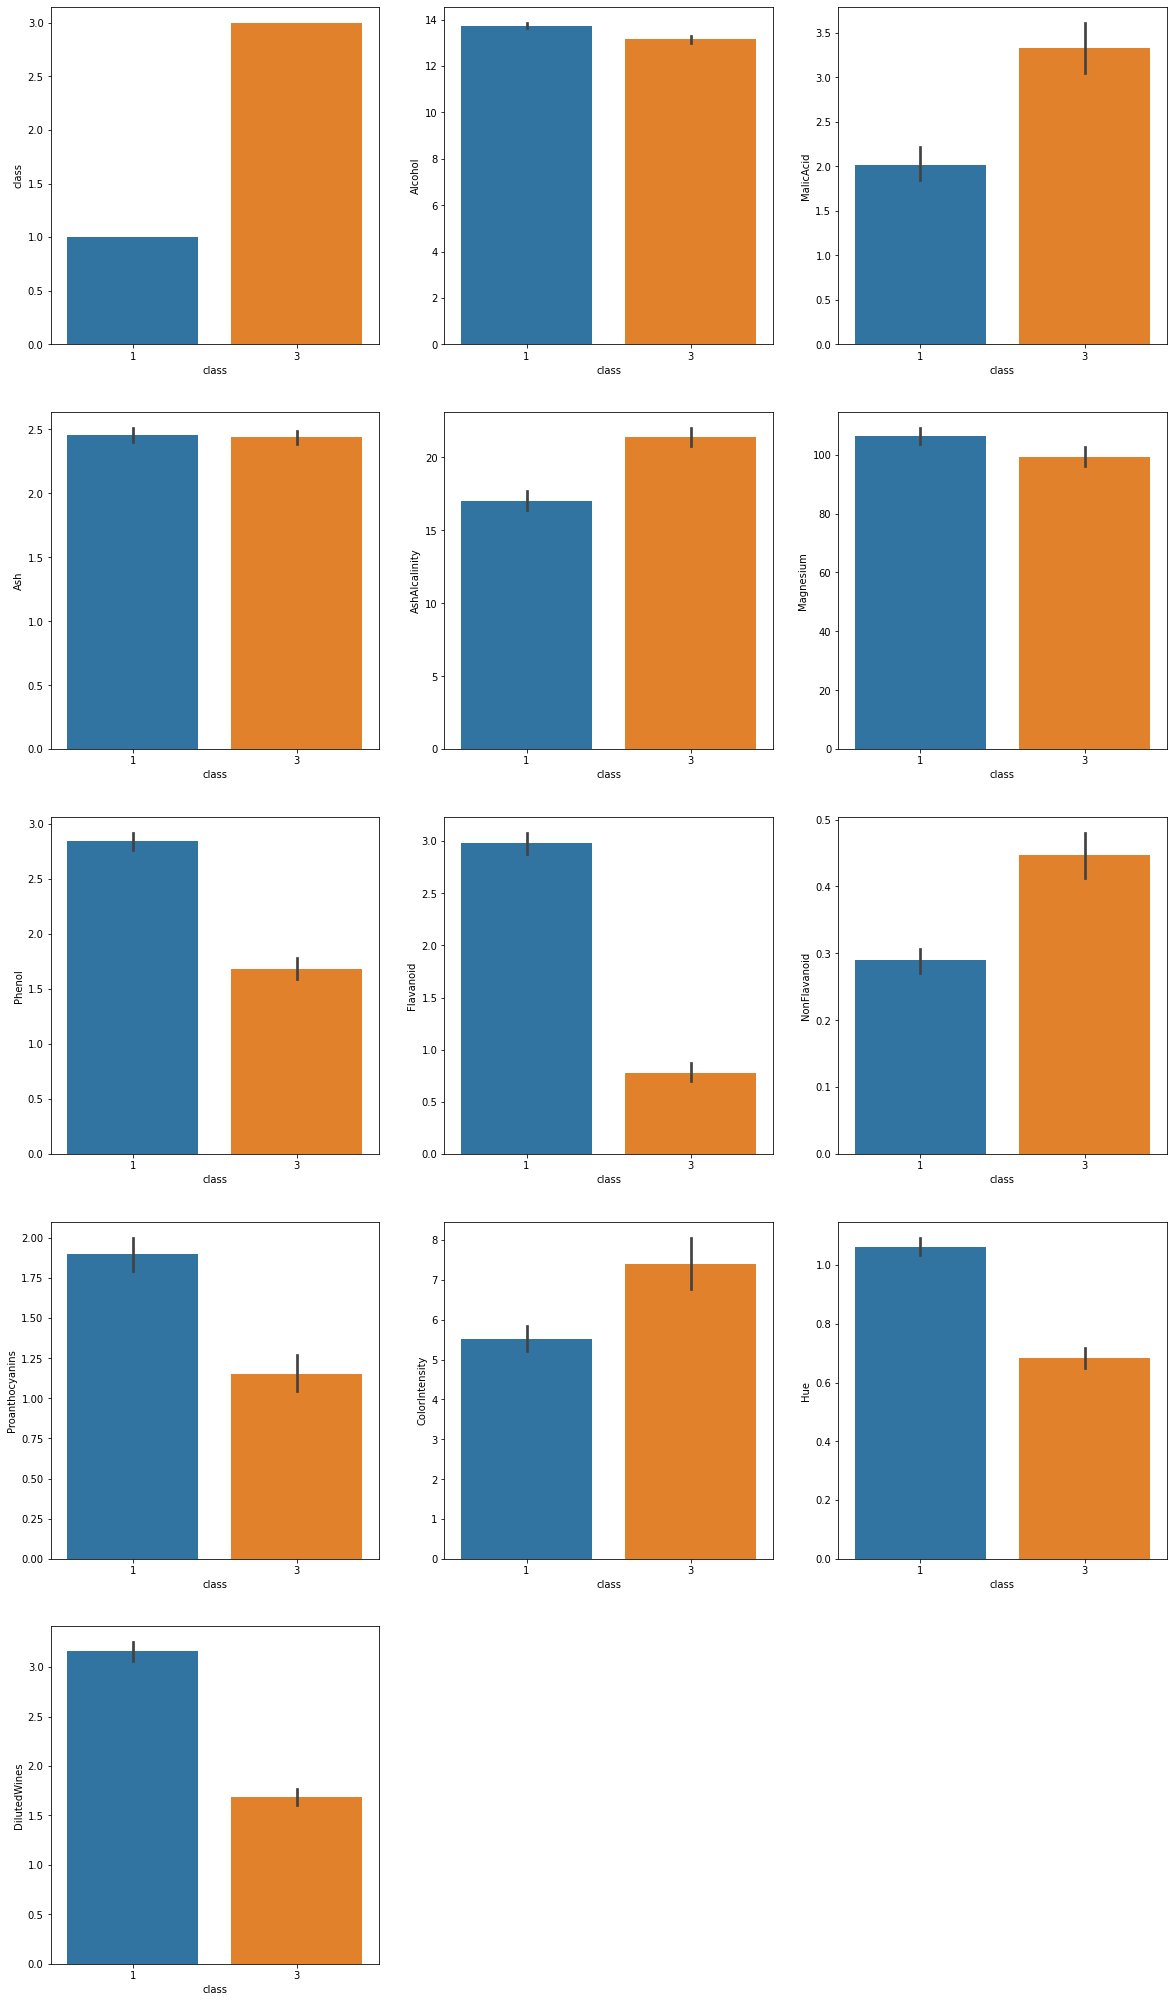

In [17]:
def plot_bar(data, cols):
    fig = plt.figure(figsize=(20, 36))
    for loc, col in enumerate(cols):
        plt.subplot(5, 3, loc+1)
        sns.barplot(x='class', y=col, data=data)
plot_bar(data, data.columns[:-1])
plt.show()

In [18]:
features = data.drop(['class'], axis=1)
target = data['class']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape

(85, 13)

In [22]:
from sklearn.model_selection import GridSearchCV

In [25]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 90.588%
Test accuracy: 90.909%


In [28]:
parameters = {
    'C': [0.05, 0.9, 1.2],
    'kernel': ['poly','sigmoid','linear', 'rbf'],
    'gamma': [0.05, 0.9, 1.2, 1.5]
    }

In [29]:
clf_model = GridSearchCV(svc_model, param_grid=parameters, scoring='accuracy', cv=15)

In [30]:
clf_model.fit(X_train, y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.9, 1.2], 'gamma': [0.05, 0.9, 1.2, 1.5],
                         'kernel': ['poly', 'sigmoid', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
clf_model.best_params_

{'C': 0.05, 'gamma': 0.05, 'kernel': 'poly'}

In [34]:
svc2 = SVC(C = 0.05, gamma =  0.05, kernel= 'poly')
svc2.fit(X_train, y_train)
train_pred_2 = svc2.predict(X_train)
test_pred_2 = svc2.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred_2)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred_2)*100:.3f}%")

Train accuracy: 100.000%
Test accuracy: 100.000%
